In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
import re
import sklearn
import numpy as np
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5);
sns.set_style('whitegrid')

In [205]:
by_customer = pd.read_csv('./order_by_customer.csv')
customer = pd.read_csv('./customer_basic.csv')
restaurant = pd.read_csv('./restaurant.csv')

In [206]:
by_customer = by_customer.drop('Unnamed: 0',axis=1)
by_customer


,customer_id,LOCATION_NUMBER,VENDOR
0,92PEE24,0,105 105 105
1,QS68UD8,0,294
2,MB7VY5F,0,83 83 83 83
3,KDJ951Y,0,90
4,BAL0RVT,0,83 83 83
...,...,...,...
43636,3S6VG6R,1,199
43637,ND4PIJL,0,907
43638,1NRK5HF,0,105
43639,QDXLWM7,1,28


In [207]:
customer

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
1,100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [208]:
for i in restaurant.keys():
    print(i)

Unnamed: 0
vendor_id
vendor_rating2
favorite_by
rated_by
favorite_percentage
rated_percentage
average_price
average_item_sold
latitude
longitude
vendor_category_id
delivery_charge
prepration_time
discount_percentage
status
verified
rank
vendor_rating
one_click_vendor
city_id
tag_1
tag_2
tag_3
tag_4
tag_5
tag_6
tag_7
tag_8
tag_9
tag_10
tag_11
tag_12
tag_13
tag_14
tag_15
tag_16
tag_17
tag_18
tag_19
tag_20
tag_21
tag_22
tag_23
tag_24
tag_25
tag_26
tag_27
tag_28
tag_29
tag_30
tag_31
tag_32
tag_33
tag_34
tag_35
tag_36
tag_37
tag_38
tag_39
tag_40
tag_41
tag_42
tag_43
tag_44
tag_45
tag_46
tag_47
tag_48
tag_49
tag_50
tag_51
tag_52
tag_53
tag_54
tag_55
tag_56
tag_57
tag_58
tag_59
tag_60
tag_61
tag_62
tag_63
tag_64
tag_65
tag_66
tag_67
tag_68
tag_69
tag_70
tag_71
tag_72
tag_73
tag_74
tag_75
tag_76
tag_77
tag_78
tag_79
tag_80
tag_81
tag_82
tag_83
tag_84
tag_85
tag_86
tag_87
tag_88
tag_89
tag_90
tag_91


In [209]:
restaurant

,Unnamed: 0,vendor_id,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold,latitude,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,0,4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527,-0.588596,...,0,0,0,0,0,0,0,0,0,1
1,1,13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566,-0.471654,...,0,0,0,0,0,0,0,0,0,0
2,2,20,4.040328,23.338500,201,0.411239,0.126654,4.040328,2.655098,-0.407527,...,0,0,0,0,0,0,0,0,0,1
3,3,23,4.180435,23.201848,122,0.343921,0.132609,4.180435,2.542363,-0.585385,...,0,0,0,0,0,0,0,0,0,0
4,4,28,3.682498,12.937671,225,0.214428,0.146389,3.682498,3.093899,0.480602,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,849,4.785380,11.483037,277,0.040300,0.259606,4.785380,1.988754,-1.588060,...,0,0,0,0,0,0,0,0,0,1
96,96,855,4.799037,12.058965,213,0.034898,0.256318,4.799037,2.037304,2.145206,...,0,0,0,0,0,0,0,0,0,1
97,97,856,4.823529,12.232638,243,0.011385,0.230550,4.823529,2.064516,0.251469,...,0,0,0,0,0,0,0,0,0,1
98,98,858,4.836047,11.285465,187,0.016279,0.217442,4.836047,1.966279,0.019817,...,0,0,0,0,0,0,0,0,0,1


In [210]:
customer.dropna()

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
1,100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [211]:
customer_array = customer.to_numpy()[:,2:]
restaurant_rare = restaurant.copy()
customer_array

array([[0, 0, 1, ..., 1, 6.65, 2.289741952599145],
       [0, 1, 0, ..., 1, 6.65, 2.289741952599145],
       [0, 2, 2, ..., 1, 6.65, 2.289741952599145],
       ...,
       [3, 0, 0, ..., 1, 0.9, 3.0],
       [1, 0, 2, ..., 0, 11.4, 2.0],
       [1, 0, 2, ..., 0, 27.7, 4.0]], dtype=object)

# User Base Recommendation

## Assign weights to each feature

### city_id is supper critical, so we assign large weight. (customer_array[:,5]*=100.) Note that latitude_x and	longitude_x is also important but originally has large variance, so we keep them the same.)
### We want to amplify the customer's preference (customer_array[:,6]*=3.)
### grand_total and	item_count may not be so important, we dilute them (customer_array[:,-2:]/=3.)

### For each query we generate three results, two of them are based on the user's preference. The last one are on food categories that's less frequent

In [212]:
restaurant_rare

,Unnamed: 0,vendor_id,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold,latitude,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,0,4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527,-0.588596,...,0,0,0,0,0,0,0,0,0,1
1,1,13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566,-0.471654,...,0,0,0,0,0,0,0,0,0,0
2,2,20,4.040328,23.338500,201,0.411239,0.126654,4.040328,2.655098,-0.407527,...,0,0,0,0,0,0,0,0,0,1
3,3,23,4.180435,23.201848,122,0.343921,0.132609,4.180435,2.542363,-0.585385,...,0,0,0,0,0,0,0,0,0,0
4,4,28,3.682498,12.937671,225,0.214428,0.146389,3.682498,3.093899,0.480602,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,849,4.785380,11.483037,277,0.040300,0.259606,4.785380,1.988754,-1.588060,...,0,0,0,0,0,0,0,0,0,1
96,96,855,4.799037,12.058965,213,0.034898,0.256318,4.799037,2.037304,2.145206,...,0,0,0,0,0,0,0,0,0,1
97,97,856,4.823529,12.232638,243,0.011385,0.230550,4.823529,2.064516,0.251469,...,0,0,0,0,0,0,0,0,0,1
98,98,858,4.836047,11.285465,187,0.016279,0.217442,4.836047,1.966279,0.019817,...,0,0,0,0,0,0,0,0,0,1


In [213]:
customer_array[:,-2:]/=3.
customer_array[:,5]*=100.
customer_array[:,6:]*=3.

In [214]:
customer_array[:,6:-2]

array([[3.0, 3.0, 0.0, ..., 0.0, 0.0, 3.0],
       [3.0, 3.0, 0.0, ..., 0.0, 0.0, 3.0],
       [3.0, 3.0, 0.0, ..., 0.0, 0.0, 3.0],
       ...,
       [3.0, 0.0, 0.0, ..., 0.0, 0.0, 3.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [3.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

[686940.0 395445.0 141039.0 702888.0 1138362.0 125574.0 17148.0 1347021.0
 149634.0 354105.0 70794.0 145875.0 85116.0 0.0 277848.0 1170777.0 23856.0
 0.0 45543.0 0.0 24483.0 300102.0 428259.0 881985.0 65709.0 29532.0
 585039.0 403557.0 204756.0 454713.0 142557.0 321756.0 189480.0 168471.0
 126435.0 179526.0 0.0 525390.0 0.0 0.0 110802.0 75939.0 204750.0 71769.0
 49917.0 2277.0 52944.0 380514.0 18402.0 36729.0 77031.0 331029.0 33480.0
 34464.0 0.0 77547.0 103758.0 36330.0 0.0 101454.0 66477.0 65709.0 15198.0
 23442.0 0.0 0.0 24483.0 0.0 0.0 0.0 18162.0 0.0 23091.0 0.0 0.0 0.0
 11355.0 0.0 30705.0 46503.0 0.0 0.0 17577.0 0.0 0.0 11886.0 0.0 0.0
 20148.0 23241.0 777687.0]


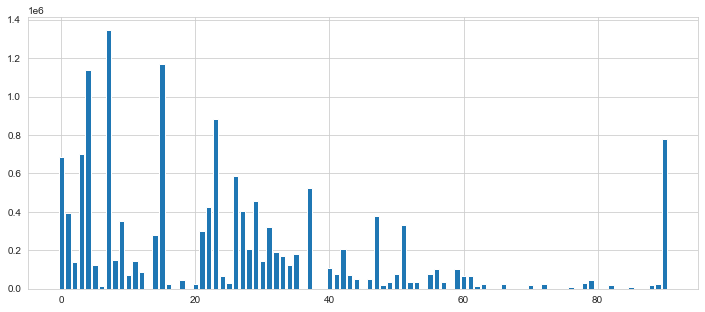

[False False  True False False  True  True False  True False  True  True
  True  True  True False  True  True  True  True  True False False False
  True  True False False  True False  True False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False]
0.0
[0.0 0.0 141039.0 0.0 0.0 125574.0 17148.0 0.0 149634.0 0.0 70794.0
 145875.0 85116.0 0.0 277848.0 0.0 23856.0 0.0 45543.0 0.0 24483.0 0.0 0.0
 0.0 65709.0 29532.0 0.0 0.0 204756.0 0.0 142557.0 0.0 189480.0 168471.0
 126435.0 179526.0 0.0 0.0 0.0 0.0 110802.0 75939.0 204750.0 71769.0
 49917.0 2277.0 52944.0 0.0 18402.0 36729.0 77031.0 0.0 33480.0 34464.0
 0.0 77547.0 103758.0 36330.0 0.0 101454.0 66477.0 65709.0 15198.0 23442.0
 0.0 0.0 

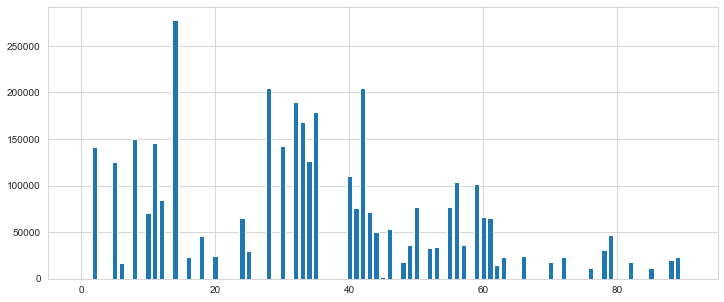

[False False  True False False  True  True False  True False  True  True
  True  True  True False  True  True  True  True  True False False False
  True  True False False  True False  True False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False]
drop  2
drop  5
drop  6
drop  8
drop  10
drop  11
drop  12
drop  13
drop  14
drop  16
drop  17
drop  18
drop  19
drop  20
drop  24
drop  25
drop  28
drop  30
drop  32
drop  33
drop  34
drop  35
drop  36
drop  38
drop  39
drop  40
drop  41
drop  42
drop  43
drop  44
drop  45
drop  46
drop  48
drop  49
drop  50
drop  52
drop  53
drop  54
drop  55
drop  56
drop  57
drop  58
drop  59
drop  60
drop  61
drop  62
drop  63
drop  64
drop  65
drop  66

In [215]:
customer_array_rare = customer_array.copy()[:,6:-2]

distribution = np.sum(customer_array_rare,0)
print(distribution)
plt.bar([i for i in range(len(distribution))],distribution)
plt.show()

rare_ind = np.abs(np.sum(customer_array_rare,0))<300000
print(rare_ind)
customer_array_rare[:,~rare_ind]*=0
print(np.min(customer_array_rare))
distribution = np.sum(customer_array_rare,0)
print(distribution)
plt.bar([i for i in range(len(distribution))],distribution)
plt.show()
print(rare_ind)

keep_index = []
for i in range(rare_ind.shape[0]):
    if rare_ind[i]==True:
        print("drop ",i)
        index_names = restaurant_rare[(restaurant_rare['tag_'+str(int(i+1))]>0)].index
        #print(index_names)
        keep_index.extend(index_names.values)
        #break
print(keep_index)
to_drop = [int(i) for i in range(len(restaurant_rare)) if int(i) not in keep_index]
print(to_drop)
#restaurant_rare.drop(index_names, inplace = True)
        

In [216]:
restaurant_rare.drop(to_drop, inplace = True)
restaurant_rare

,Unnamed: 0,vendor_id,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold,latitude,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,0,4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527,-0.588596,...,0,0,0,0,0,0,0,0,0,1
1,1,13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566,-0.471654,...,0,0,0,0,0,0,0,0,0,0
5,5,33,3.842621,21.886739,286,0.340260,0.147575,3.842621,3.296811,-0.494654,...,0,0,0,0,0,0,0,0,0,0
11,11,75,4.119027,18.105213,86,0.448517,0.074718,4.119027,2.802557,-0.600423,...,0,0,0,0,0,0,0,0,0,0
13,13,78,4.143442,12.936507,88,0.284477,0.018953,4.143442,2.983296,-0.555404,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,846,4.808910,11.921415,510,0.015240,0.199297,4.808910,1.984760,-0.441823,...,0,0,0,0,0,0,0,0,0,1
95,95,849,4.785380,11.483037,277,0.040300,0.259606,4.785380,1.988754,-1.588060,...,0,0,0,0,0,0,0,0,0,1
97,97,856,4.823529,12.232638,243,0.011385,0.230550,4.823529,2.064516,0.251469,...,0,0,0,0,0,0,0,0,0,1
98,98,858,4.836047,11.285465,187,0.016279,0.217442,4.836047,1.966279,0.019817,...,0,0,0,0,0,0,0,0,0,1


In [217]:
by_customer_rare = by_customer.copy()
keep = restaurant_rare['vendor_id'].values.tolist()
print(keep)
for i in range(len(by_customer_rare)):
    s = by_customer_rare.iloc[i]['VENDOR']
    v = s.split(' ')
    v_ = [t for t in v if int(t) in keep]
    s_ = ' '.join(v_)
    by_customer_rare.loc[i,'VENDOR']= s_
by_customer_rare

[4, 13, 33, 75, 78, 81, 82, 85, 86, 92, 104, 105, 106, 110, 115, 134, 145, 148, 154, 157, 161, 180, 188, 193, 195, 197, 199, 201, 203, 207, 216, 221, 225, 237, 250, 259, 265, 271, 274, 288, 294, 295, 298, 299, 300, 303, 310, 356, 386, 391, 398, 401, 419, 537, 547, 575, 577, 676, 679, 681, 841, 843, 845, 846, 849, 856, 858, 907]


,customer_id,LOCATION_NUMBER,VENDOR
0,92PEE24,0,105 105 105
1,QS68UD8,0,294
2,MB7VY5F,0,
3,KDJ951Y,0,
4,BAL0RVT,0,
...,...,...,...
43636,3S6VG6R,1,199
43637,ND4PIJL,0,907
43638,1NRK5HF,0,105
43639,QDXLWM7,1,


In [218]:
customer

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
1,100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [238]:
index_names = by_customer_rare[(by_customer_rare['VENDOR']=='')].index
by_customer_rare.drop(index_names, inplace = True)
#customer_id_to_drop = by_customer_rare.iloc[index_names]['customer_id']
by_customer_rare

,customer_id,LOCATION_NUMBER,VENDOR
0,92PEE24,0,105 105 105
1,QS68UD8,0,294
6,I9DNSMJ,0,105 105 105 105 105 105 105 105 105 105 105 105
7,QYXXJCF,0,78
9,QQEWRHI,0,105 105 105 105 85 105 105 105
...,...,...,...
43632,X1DF55Z,3,356
43634,8PSO92C,0,237
43636,3S6VG6R,1,199
43637,ND4PIJL,0,907


In [240]:
index_to_keep = []
for i in range(len(by_customer_rare)):
    if i%500==0:
        print(i)
    name = by_customer_rare.iloc[i]['customer_id']
    loc = by_customer_rare.iloc[i]['LOCATION_NUMBER']
    ind = customer[(customer['customer_id']==name) & (customer['location_number']==loc)].index.tolist()
    index_to_keep.extend(ind)
print(len(index_to_keep))

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
[9658, 31945, 10906, 5046, 23546, 19557, 14944, 23126, 17534, 5329, 26099, 32378, 7064, 9947, 7968, 25592, 16255, 24142, 21816, 2101, 18317, 6025, 31765, 28715, 4201, 4965, 3152, 19693, 20878, 20570, 32193, 9464, 29002, 179, 12984, 28587, 8512, 18510, 4551, 10070, 3339, 2022, 14706, 15510, 19003, 17627, 2552, 12491, 15186, 30700, 32195, 18023, 27101, 20422, 28676, 24693, 30608, 29744, 12495, 31119, 23279, 12496, 30707, 13759, 22650, 20272, 29177, 18348, 29278, 2628, 3729, 29889, 12566, 21175, 32394, 12385, 346, 8504, 11426, 20945, 31356, 27092, 16600, 30960, 5198, 23120, 21665, 3819, 23712, 5381, 26563, 28216, 22603, 17684, 20793, 1

In [241]:
index_to_drop = []
for i in range(len(customer)):
    if i not in index_to_keep:
        index_to_drop.append(i)
print(len(index_to_drop))

[1, 2, 5, 9, 11, 12, 13, 15, 19, 21, 30, 36, 37, 39, 50, 54, 57, 61, 63, 64, 65, 66, 70, 72, 73, 74, 75, 76, 77, 80, 84, 85, 86, 87, 90, 91, 92, 94, 95, 101, 102, 108, 109, 113, 116, 120, 126, 131, 132, 137, 138, 145, 146, 147, 148, 149, 150, 152, 161, 163, 165, 166, 178, 183, 187, 192, 194, 195, 199, 201, 204, 214, 220, 224, 227, 230, 234, 236, 237, 238, 240, 241, 255, 261, 266, 267, 270, 272, 275, 277, 280, 281, 282, 283, 289, 293, 300, 305, 306, 310, 314, 317, 320, 322, 332, 336, 338, 340, 341, 344, 345, 348, 349, 351, 353, 354, 356, 368, 371, 374, 375, 376, 378, 381, 384, 390, 391, 394, 395, 401, 402, 405, 408, 409, 410, 411, 414, 415, 418, 420, 423, 424, 429, 430, 432, 434, 435, 438, 441, 443, 446, 455, 457, 463, 464, 468, 475, 482, 484, 488, 489, 490, 491, 493, 498, 499, 500, 501, 502, 503, 505, 507, 513, 514, 518, 519, 528, 530, 533, 534, 535, 538, 545, 547, 550, 552, 555, 560, 561, 568, 570, 580, 581, 592, 593, 595, 596, 598, 599, 600, 601, 604, 611, 612, 613, 620, 621, 624, 62

In [242]:
customer

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
1,100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [243]:

'''
#remove_customer_ids = remove_customer_ids.tolist()
#remove_customer_loc = remove_customer_loc.tolist()
customer_rare = customer.copy()
for idx,name in enumerate(zip(remove_customer_ids,remove_customer_loc)):
    if idx%500==0:
        print("%d of %d"%(idx,len(remove_customer_ids)))
    print(name)
    index_names = customer_rare[(customer_rare['customer_id','location_number']==name)].index
    customer_rare.drop(index_names, inplace = True)
customer_rare
'''
customer_rare = customer.copy()
customer_rare.drop(index_to_drop, inplace = True)
customer_rare

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.44000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.17550,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.19120,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
6,600,ZGFSYCZ,0,3,0,0.04245,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
7,700,ZGFSYCZ,0,4,0,-0.63100,-78.50000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49178,5800200,L6GV7ZE,3,0,2,-1.79500,-0.08185,1.0,1,0,...,0,0,0,0,0,0,0,0,28.100000,2.000000
49180,5800500,NCTU1O6,3,0,2,-0.70950,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.35000,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.14900,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000


In [245]:
index_to_keep = []
for i in range(len(by_customer)):
    if i%500==0:
        print(i)
    name = by_customer.iloc[i]['customer_id']
    loc = by_customer.iloc[i]['LOCATION_NUMBER']
    ind = customer[(customer['customer_id']==name) & (customer['location_number']==loc)].index.tolist()
    index_to_keep.extend(ind)
print(len(index_to_keep))
index_to_drop = []
for i in range(len(customer)):
    if i not in index_to_keep:
        index_to_drop.append(i)
print(len(index_to_drop))
customer.drop(index_to_drop, inplace = True)
customer

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
42558
6627


,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.44000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.12870,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.17550,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.19120,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
6,600,ZGFSYCZ,0,3,0,0.04245,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.70950,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.35000,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.14900,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.32600,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [248]:
customer_array[0]

array([0, 0, 1, -96.44, -67.2, 100.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0,
       6.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.65, 2.289741952599145],
      dtype=object)

In [249]:
by_customer_rare.to_csv('by_customer_rare.csv')
customer_rare = customer_rare.astype({'latitude_x':float,'longitude_x':float})
customer_rare = customer_rare.dropna()
#customer_rare.drop(['Unnamed: 0'],axis=1)
customer_rare.to_csv('customer_rare.csv')

In [250]:
customer_rare_array = customer_rare.to_numpy()[:,2:]
customer_rare_array[:,-2:]/=3.
customer_rare_array[:,5]*=100.
customer_rare_array[:,6:]*=3.

In [251]:
customer = customer.astype({'latitude_x':float,'longitude_x':float})
customer = customer.dropna()
customer.to_csv('customer.csv')

In [252]:
customer_array = customer.to_numpy()[:,2:]
customer_array[:,-2:]/=3.
customer_array[:,5]*=100.
customer_array[:,6:]*=3.
customer_array = customer_array.astype(float)
idxs = np.where(np.isnan(customer_array.astype(float))==True)
mask = [i for i in range(customer_array.shape[0]) if i not in idxs[0].tolist()]
customer_array = customer_array[mask]

In [253]:

print(np.max(customer_array.astype(float)))
print(np.max(customer_array.astype(float)))
print(np.any(np.isnan(customer_rare_array.astype(float))))
print(np.any(np.isnan(customer_array.astype(float))))

4230.0
4230.0
False
False


In [254]:
np.save("customer_array",customer_array)
np.save("customer_rare_array",customer_rare_array)
by_customer_rare.to_csv('by_customer_rare.csv')
by_customer.to_csv('by_customer.csv')

In [255]:
customer_array.shape

(42553, 99)

In [256]:
customer_rare_array.shape

(30849, 99)

In [257]:
by_customer_rare

,customer_id,LOCATION_NUMBER,VENDOR
0,92PEE24,0,105 105 105
1,QS68UD8,0,294
6,I9DNSMJ,0,105 105 105 105 105 105 105 105 105 105 105 105
7,QYXXJCF,0,78
9,QQEWRHI,0,105 105 105 105 85 105 105 105
...,...,...,...
43632,X1DF55Z,3,356
43634,8PSO92C,0,237
43636,3S6VG6R,1,199
43637,ND4PIJL,0,907


In [258]:
by_customer

,customer_id,LOCATION_NUMBER,VENDOR
0,92PEE24,0,105 105 105
1,QS68UD8,0,294
2,MB7VY5F,0,83 83 83 83
3,KDJ951Y,0,90
4,BAL0RVT,0,83 83 83
...,...,...,...
43636,3S6VG6R,1,199
43637,ND4PIJL,0,907
43638,1NRK5HF,0,105
43639,QDXLWM7,1,28


In [259]:
customer_array[0]

array([  0.        ,   0.        ,   1.        , -96.44      ,
       -67.2       , 100.        ,   3.        ,   3.        ,
         0.        ,   0.        ,   3.        ,   0.        ,
         0.        ,   6.        ,   0.        ,   3.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   3.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   3.        ,   0.        ,   0.        ,
         3.        ,   0.        ,   0.        ,   3.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   3.        ,   0.  

In [260]:
customer_rare

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.44000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.17550,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.19120,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
6,600,ZGFSYCZ,0,3,0,0.04245,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
7,700,ZGFSYCZ,0,4,0,-0.63100,-78.50000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49178,5800200,L6GV7ZE,3,0,2,-1.79500,-0.08185,1.0,1,0,...,0,0,0,0,0,0,0,0,28.100000,2.000000
49180,5800500,NCTU1O6,3,0,2,-0.70950,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.35000,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.14900,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000


In [261]:
customer

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.44000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.12870,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.17550,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.19120,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
6,600,ZGFSYCZ,0,3,0,0.04245,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.70950,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.35000,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.14900,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.32600,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000
